# Data Analysis of ABC Business School students for designing tailored made programs.

## Data Cleaning Begins Below

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.io as pio
pio.templates.default = "ggplot2"
#Note theme can also be set as "plotly_dark", "plotly_white","seaborn"

import numpy as np
from scipy.integrate import odeint
!pip install bokeh
from bokeh.plotting import figure, show

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 92.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 kB 96.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 34.9 MB/s eta 0:00:00
  Attempting uninstall: contourpy
    Found existing installation: contourpy 1.0.5
    Not uninstalling contourpy at /shared-libs/python3.9/py/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'contourpy'. No files were found to uninstall.

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
df = pd.read_csv("/work/Active_Sheet_Cleaned.csv")

In [ ]:
print(df.shape, end  = "\n\n")
print(df.columns)

(896, 28)

Index(['Unnamed: 0', 'Gender', 'MajorSpecialization', 'MinorSpecialization',
       'CGPA', 'CGPA_Rounded', 'CGPARange', '10thBoard/SSC',
       'YearofPassout-10th', '10th%(OnlyMentionpercentage)',
       '10thStudiedMedium', '12thBoard/HSC', 'YearofPassout_12th',
       '12th%(OnlyMentionpercentage)', 'GraduationDegree',
       'DegreeSpecializationSubject', 'GraduationPercentage(%)',
       'YearofPassout-Graduation', 'Workexperience(Totalmonths)',
       'WorkExperienceY', 'WorkExperienceRange', 'LastWorkExCompanyName',
       'LastWorkExDesignation', 'Age', 'Age Group', 'Aggregate_Percent',
       'AggregatePercentRange', 'GraduationField'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    896 non-null    int64  
 1   Gender                        896 non-null    object 
 2   MajorSpecialization           896 non-null    object 
 3   MinorSpecialization           896 non-null    object 
 4   CGPA                          896 non-null    float64
 5   CGPA_Rounded                  896 non-null    float64
 6   CGPARange                     896 non-null    object 
 7   10thBoard/SSC                 896 non-null    object 
 8   YearofPassout-10th            896 non-null    int64  
 9   10th%(OnlyMentionpercentage)  896 non-null    float64
 10  10thStudiedMedium             896 non-null    object 
 11  12thBoard/HSC                 896 non-null    object 
 12  YearofPassout_12th            896 non-null    int64  
 13  12th%

In [ ]:
df.describe()

,Unnamed: 0,CGPA,CGPA_Rounded,YearofPassout-10th,10th%(OnlyMentionpercentage),YearofPassout_12th,12th%(OnlyMentionpercentage),GraduationPercentage(%),YearofPassout-Graduation,Workexperience(Totalmonths),WorkExperienceY,Age,Aggregate_Percent
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,874.000000,896.000000,896.000000,896.000000
mean,447.500000,6.692511,6.696429,2016.205357,80.244615,2018.244420,76.454758,75.466722,2021.645089,5.052975,0.410681,23.261161,74.772801
std,258.797218,0.527515,0.606693,1.696600,9.445312,1.685121,10.773275,8.115797,1.447455,11.461931,0.945569,1.767139,5.387796
min,0.000000,5.460000,5.000000,2003.000000,50.375000,2005.000000,8.200000,52.160000,2008.000000,0.000000,0.000000,20.000000,61.162500
25%,223.750000,6.310000,6.000000,2015.750000,74.000000,2018.000000,68.475000,70.056250,2021.000000,0.000000,0.000000,22.000000,70.876875
50%,447.500000,6.650000,7.000000,2017.000000,81.700000,2019.000000,77.000000,75.895000,2022.000000,0.000000,0.000000,23.000000,74.958125
75%,671.250000,7.050000,7.000000,2017.000000,87.400000,2019.000000,84.600000,81.107500,2023.000000,3.000000,0.000000,24.000000,78.364375
max,895.000000,8.320000,8.000000,2018.000000,100.000000,2022.000000,99.500000,97.300000,2023.000000,120.000000,10.000000,37.000000,91.807500


In [ ]:
#There are some NA values 3 fields, however, their presence is irrelevant. Hence, NA values are not dropped or removed
df.isna().sum()

Unnamed: 0                        0
Gender                            0
MajorSpecialization               0
MinorSpecialization               0
CGPA                              0
CGPA_Rounded                      0
CGPARange                         0
10thBoard/SSC                     0
YearofPassout-10th                0
10th%(OnlyMentionpercentage)      0
10thStudiedMedium                 0
12thBoard/HSC                     0
YearofPassout_12th                0
12th%(OnlyMentionpercentage)      0
GraduationDegree                  0
DegreeSpecializationSubject      33
GraduationPercentage(%)           0
YearofPassout-Graduation          0
Workexperience(Totalmonths)      22
WorkExperienceY                   0
WorkExperienceRange               0
LastWorkExCompanyName           674
LastWorkExDesignation           674
Age                               0
Age Group                         0
Aggregate_Percent                 0
AggregatePercentRange             0
GraduationField             

In [ ]:
#No duplicates
df.duplicated().sum()

0

In [ ]:
df.GraduationDegree.unique()

array(['B.Tech', 'B.Com', 'B.A ', 'B.E', 'B.B.A', 'B.Sc', 'B.M.S ',
       'LL.B.', 'B.C.A ', 'B.H.M', 'B.A.F', 'B.B.M', 'B.Voc', 'B.J.M.C ',
       'B.PHARMA', 'B.Des', 'B.A.J.M.C',
       'B.A.M.M.C (Bachelor of Arts in Multimedia and Mass Communication)',
       'B.M.M', 'B.Tech/MTech Dual Degree ', 'B.Plan', 'B.D.S',
       'B.Tech/MTech Dual Degree', 'B.A', 'B.B.A-LLB', 'Integrated MSc',
       'Bachelor of Urban Planning', 'B.F.M ',
       'General Nursing and Midwife (G. N. M)'], dtype=object)

In [ ]:
field = {
    "B.Tech":"Tech",
    "B.Com":"Commerce",
    "B.A ":"Arts",
    "B.E":"Engineering",
    "B.B.A":"Management",
    "B.Sc":"Science",
    "B.M.S ":"Management",
    "LL.B.":"Law",
    "B.C.A ":"Tech",
    "B.H.M":"Management",
    "B.A.F":"Commerce",
    "B.B.M":"Management",
    "B.Voc":"Arts",
    "B.J.M.C ":"Arts",
    "B.PHARMA":"Medicine",
    "B.Des":"Medicine",
    "B.A.J.M.C":"Arts",
    "B.A.M.M.C (Bachelor of Arts in Multimedia and Mass Communication)":"Arts",
    "B.M.M":"Arts",
    "B.Tech/MTech Dual Degree":"Tech",
    "B.Tech/MTech Dual Degree ":"Tech",
    "B.Plan":"Other",
    "B.D.S":"Medicine",
    "B.A":"Arts",
    "B.B.A-LLB":"Law",
    "Integrated MSc":"Science",
    "Bachelor of Urban Planning":"Other",
    "B.F.M ":"Commerce",
    "General Nursing and Midwife (G. N. M)":"Medicine"
}

In [ ]:
#Creating a new column with the graduation field
df["GraduationField"] = df.GraduationDegree.map(field)

In [ ]:
df.GraduationField.unique()

array(['Tech', 'Commerce', 'Arts', 'Engineering', 'Management', 'Science',
       'Law', 'Medicine', 'Other'], dtype=object)

In [ ]:
df["10thStudiedMedium"].replace('English ',"English", inplace = True)
df["10thStudiedMedium"].replace('Marathi ',"Marathi", inplace = True)
df["10thStudiedMedium"].replace('Bengali ',"Bengali", inplace = True)
df["10thStudiedMedium"].replace(' English',"English", inplace = True)
df["10thStudiedMedium"].replace('Gujarati ',"Gujarati", inplace = True)

In [ ]:
df['10thStudiedMedium'].unique()

array(['English', 'Marathi', 'Bengali', 'Hindi', 'Telugu', 'Gujarati',
       'Odia', 'Kannada '], dtype=object)

### Data Visualization Begins Below

Pranav's Visuals

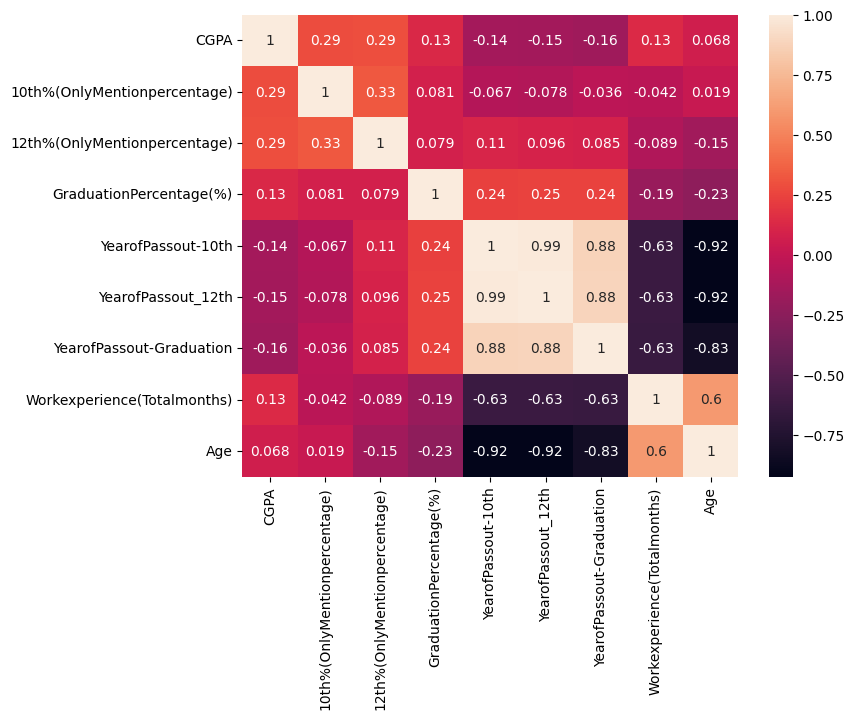

In [ ]:
#Heatmap for correlation
Fields = ['CGPA','10th%(OnlyMentionpercentage)','12th%(OnlyMentionpercentage)','GraduationPercentage(%)','YearofPassout-10th','YearofPassout_12th','YearofPassout-Graduation','Workexperience(Totalmonths)','Age']
plt.figure(figsize=(8,6))
sns.heatmap(df[Fields].corr(), annot=True, cmap='rocket')
plt.show()

#Results:
#Age and workexperience have a high correlation. All the passout years are highly correlated.
#age and Work experience are negatively correlated with passout years which makes sense
#The percentages has a low positive correlation

In [ ]:
#Major and Minor specializations with counts for each of them
dfmajor = df[['MajorSpecialization','MinorSpecialization']]
dfmajor["CountCol"]= 1
dfmajor_result = dfmajor.groupby(['MajorSpecialization','MinorSpecialization'])['CountCol'].sum().reset_index().sort_values(by='CountCol',ascending = False)
dfmajor_result

,MajorSpecialization,MinorSpecialization,CountCol
1,Finance,Finance,213
16,Marketing,Operations,199
15,Marketing,Marketing,159
5,Finance,Operations,122
20,Operations,Marketing,37
4,Finance,Marketing,36
8,HR,HR,23
13,Marketing,HR,21
9,HR,Marketing,20
12,Marketing,Finance,16


In [ ]:
dfmajor = df[['MajorSpecialization','MinorSpecialization']].pivot_table(index='MajorSpecialization',columns='MinorSpecialization', aggfunc=lambda x: len(x))
dfmajor.replace(np.nan,0, inplace = True)
dfmajor

MinorSpecialization,Banking,Finance,HR,IT,Marketing,Operations,Sales
MajorSpecialization,,,,,,,
Finance,6.0,213.0,5.0,4.0,36.0,122.0,0.0
HR,2.0,3.0,23.0,0.0,20.0,8.0,0.0
IT,0.0,0.0,0.0,0.0,2.0,0.0,0.0
Marketing,0.0,16.0,21.0,4.0,159.0,199.0,1.0
Operations,0.0,13.0,2.0,0.0,37.0,0.0,0.0


In [ ]:
plt.figure(figsize = (8,6))
fig = px.density_heatmap(df, x="MajorSpecialization", y="MinorSpecialization",  marginal_x="histogram", marginal_y="histogram",text_auto=True,
                labels={
                     "MajorSpecialization": "Major Specialization",
                     "MinorSpecialization": "Minor Specialization",
                     },
                title="Major and Minor Distribution")
fig.show()

<Figure size 800x600 with 0 Axes>

In [ ]:
import plotly.graph_objects as go
dfgender = df['Gender'].value_counts().reset_index()
colors = ['mediumturquoise','lightgreen']
fig = go.Figure(data=[go.Pie(labels=dfgender.Gender, values=dfgender["count"])])
fig.update_traces(textinfo='label+percent+value',textfont_size=16,
                  marker=dict(colors=colors, line=dict(color='#000000', width=1)), hole =0.4)

fig.update_layout(
    title_text="Gender Distribution")
fig.show()

In [ ]:
#CGPA By Gender and Major
dfcgpa = df[['MajorSpecialization','Gender','CGPA_Rounded']]
dfcgpa["CountCol"]= 1
dfcgpa_result = dfcgpa.groupby(['MajorSpecialization','Gender','CGPA_Rounded'])['CountCol'].sum().reset_index().sort_values(by='CountCol',ascending = False)
dfcgpa_result
fig = px.scatter(dfcgpa_result, x="CGPA_Rounded", y="MajorSpecialization", size="CountCol", hover_name="CountCol",facet_col='Gender', log_x=True, size_max=40, width = 900, height=500,
                labels={
                     "MajorSpecialization": "Major Specialization",
                     "CGPA_Rounded": "CGPA (Rounded)",
                     },
                title="Grades for Majors by Gender"
                )
fig.show()

In [ ]:
#Language and Gender
df_gender_lang = df[['Gender','10thStudiedMedium']].value_counts().reset_index()
df_gender_lang

,Gender,10thStudiedMedium,count
0,Male,English,506
1,Female,English,366
2,Female,Bengali,5
3,Male,Hindi,4
4,Female,Gujarati,2
5,Female,Marathi,2
6,Female,Telugu,2
7,Male,Bengali,2
8,Male,Gujarati,2
9,Male,Odia,2


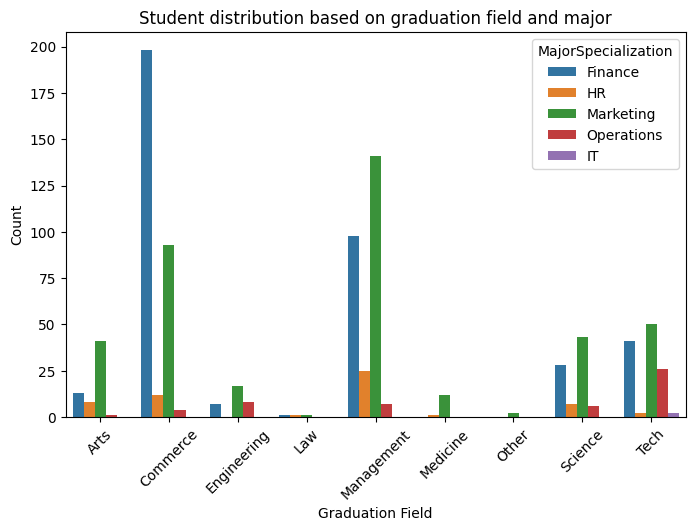

In [ ]:
#Graduation Field Distribution
plt.figure(figsize=(8,5))
df_grad = df
df_grad['CountCol'] = 1
df_grad1 = df_grad.groupby(['GraduationField','MajorSpecialization'])['CountCol'].sum().reset_index()
sns.barplot(df_grad1, x="GraduationField",y='CountCol', hue="MajorSpecialization")
plt.xlabel("Graduation Field")
plt.ylabel("Count")
plt.title("Student distribution based on graduation field and major")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#!pip install altair_viewer

import altair as alt

# Gender Distribution by Majors
gender_major = df.groupby(['Gender', 'MajorSpecialization']).size().reset_index(name='Count')
print(gender_major)
chart_major = alt.Chart(gender_major).mark_bar().encode(
    x=alt.X('MajorSpecialization', sort='-y', title="Major Specialization"),
    y=alt.Y('Count', title="Number of Students"),
    color='Gender',
    tooltip=['Gender', 'MajorSpecialization', 'Count']
).properties(
    title="Gender Distribution Across Majors",
    width=800,
    height=400
).configure_axis(
    labelAngle=-45
)
chart_major.display()


   Gender MajorSpecialization  Count
0  Female             Finance    160
1  Female                  HR     48
2  Female                  IT      1
3  Female           Marketing    154
4  Female          Operations     15
5    Male             Finance    226
6    Male                  HR      8
7    Male                  IT      1
8    Male           Marketing    246
9    Male          Operations     37


alt.Chart(...)

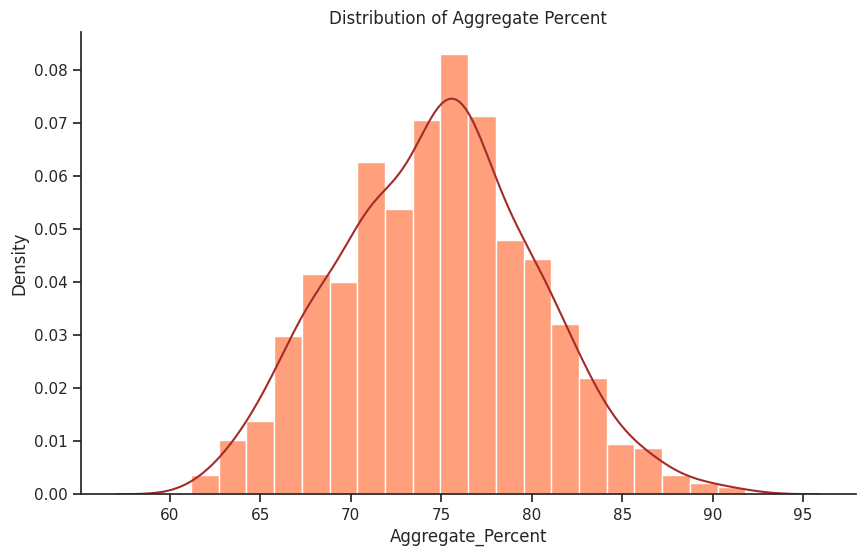

In [ ]:
# Distribution of AggregatePercentRange(IQ)
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x='Aggregate_Percent', bins=20, color="coral", kde = False, stat = "density")
sns.kdeplot(data=df, x="Aggregate_Percent", color='brown', ax=ax)
plt.title('Distribution of Aggregate Percent')
plt.show()

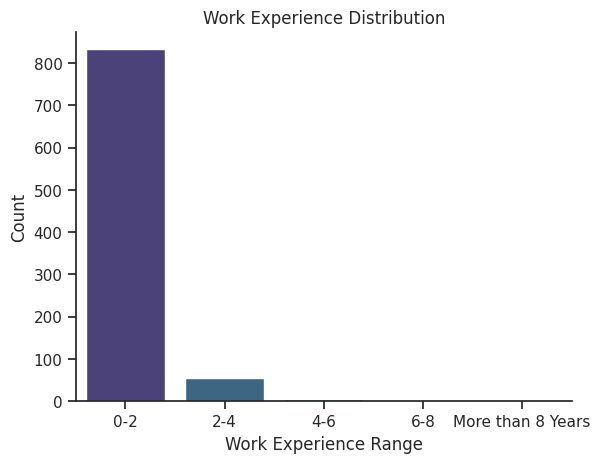

In [ ]:
# Work Experience Distribution
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
df1 = df.WorkExperienceRange.value_counts()
sns.barplot(x=df1.index, y=df1.values, palette = 'viridis', hue = df1.index)
plt.xlabel('Work Experience Range')
plt.ylabel('Count')
plt.title('Work Experience Distribution')
plt.show()

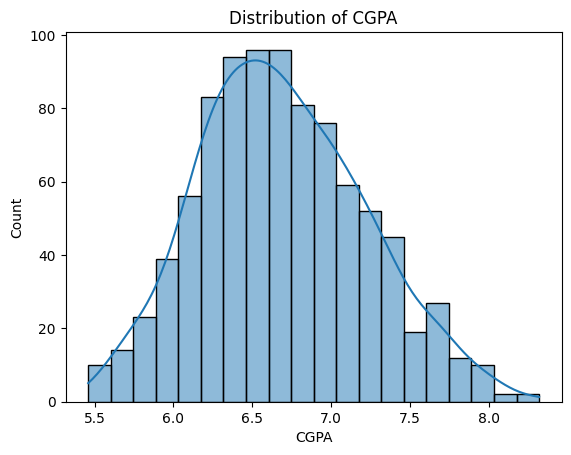

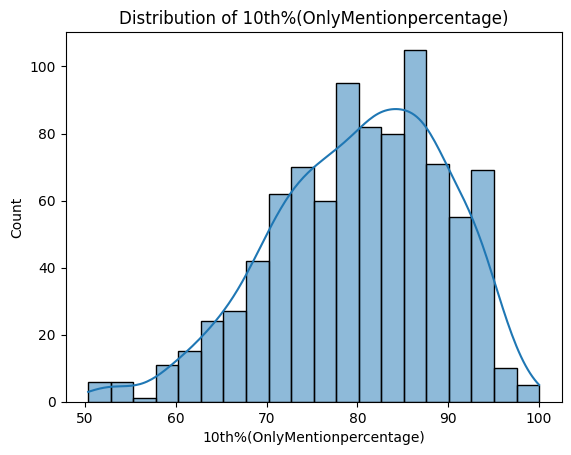

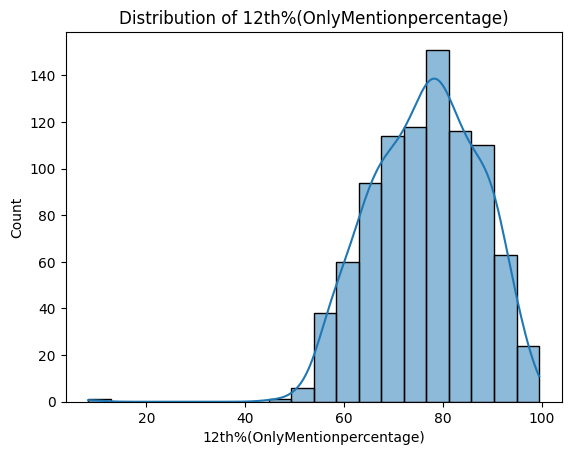

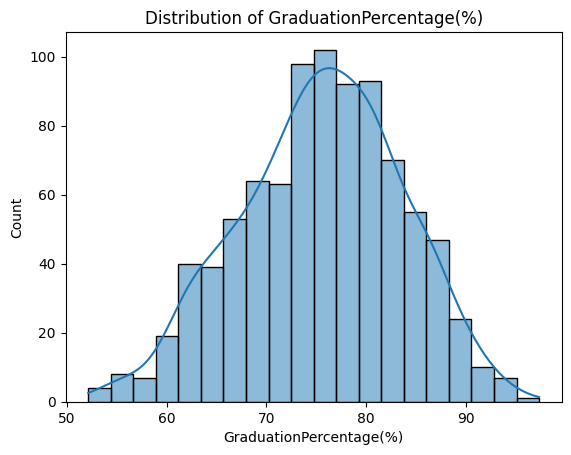

In [ ]:
#  Academic Performance Analysis
academic_cols = ['CGPA', '10th%(OnlyMentionpercentage)', '12th%(OnlyMentionpercentage)', 'GraduationPercentage(%)']
for col in academic_cols:
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()

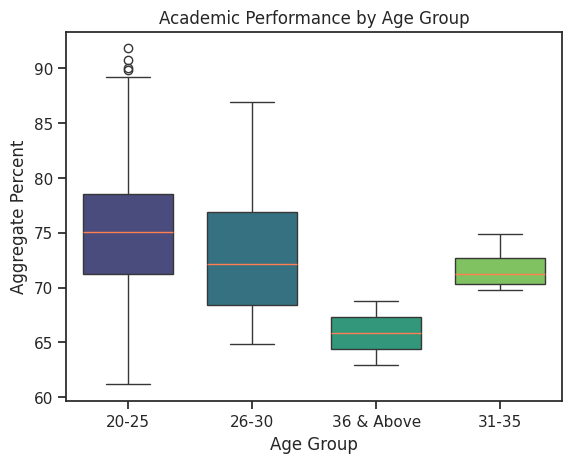

In [ ]:
sns.set_theme(style="ticks")
sns.boxplot(data=df, x='Age Group', y='Aggregate_Percent', palette = 'viridis', hue = 'Age Group', gap=.1, medianprops={"color": "coral", "linewidth": 1})
plt.title("Academic Performance by Age Group")
plt.ylabel("Aggregate Percent")
plt.show()

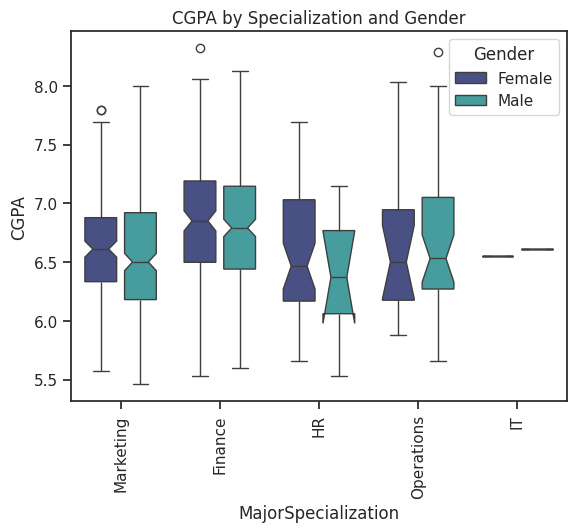

In [ ]:
sns.boxplot(data=df, x='MajorSpecialization', y='CGPA', hue='Gender', gap=.2, notch = True, palette = 'mako')
plt.title("CGPA by Specialization and Gender")
plt.xticks(rotation=90)
plt.show()
